In [8]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [9]:
# from HFC32_emimTf2N_PR import configuration
from HFC125_emimTf2N_PR import configuration

In [10]:
#need to make excel csv for 125
data = pd.read_csv('R125_emimTf2N.csv')
# print(data)

In [11]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)


In [12]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-05-17 15:46:53 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


# T = 283 K

In [13]:
print(data_283)

   temperature  pressure  x_R125  x_emimTf2N
0        283.1     10000   0.008       0.992
1        283.1    100000   0.085       0.915
2        283.1    199700   0.168       0.832
3        283.1    297700   0.250       0.750
4        283.1    399700   0.331       0.669
5        283.1    499900   0.413       0.587
6        283.1    599700   0.496       0.504
7        283.1    699900   0.583       0.417
8        283.1    799600   0.681       0.319


In [14]:
binary_params_peng(data_283, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  283.1, init_press =   399700 , init_x_c1 =    0.331, init_x_c2 = 0.669,
    init_kappa_2_1 = -0.03479509, init_kappa_1_2 = -0.015923346845, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-17 15:46:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:46:54 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:46:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:46:55 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:46:55 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:46:55 [INFO] idaes.init.fs.state_

In [15]:
k12_283 = -0.020962666274957714
k21_283 =  -0.05967357015049333

In [16]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", k21_283, k12_283,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


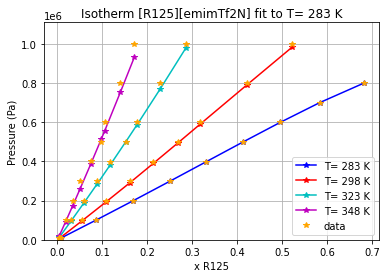

In [17]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to T= 283 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

# T = 298 K

In [18]:
print(data_298)

   temperature  pressure  x_R125  x_emimTf2N
0        298.1     10200   0.006       0.994
1        298.1     99800   0.055       0.945
2        298.1    199700   0.109       0.891
3        298.1    299700   0.161       0.839
4        298.2    399600   0.213       0.787
5        298.2    499900   0.267       0.733
6        298.2    599700   0.317       0.683
7        298.1    800100   0.422       0.578
8        298.1    999800   0.521       0.479


In [19]:
binary_params_peng(data_298, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =   298.2, init_press =  399600 , init_x_c1 =    0.213, init_x_c2 = 0.787,
    init_kappa_2_1 = k21_283, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-17 15:47:29 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:47:30 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:47:30 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:47:30 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-17 15:47:30 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-17 15:47:30 [INFO] idaes.init.fs.state_

In [20]:
k12_298 = -0.01921154922873169
k21_298 = -0.06020142589236007

In [ ]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", k21_298, k12_298,verbose=False)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


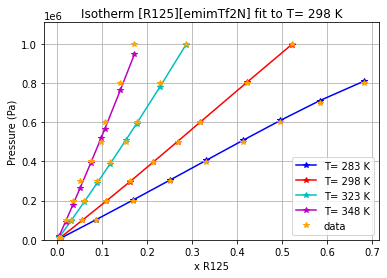

In [15]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

# T = 323 K 

In [16]:
print(data_323)

   temperature  pressure  x_R125  x_emimTf2N
0        323.1     10200   0.004       0.996
1        323.1     99800   0.030       0.970
2        323.1    200000   0.059       0.941
3        323.1    299800   0.088       0.912
4        323.1    399600   0.117       0.883
5        323.1    500200   0.152       0.848
6        323.1    599700   0.176       0.824
7        323.1    799900   0.228       0.772
8        323.1   1000100   0.285       0.715


In [17]:
binary_params_peng(data_323, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  323.1, init_press =   500200 , init_x_c1 =0.152, init_x_c2 =  0.848,
    init_kappa_2_1 = k21_298, init_kappa_1_2 = k12_298, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-04 01:41:02 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:02 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:41:02 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:02 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:41:02 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:03 [INFO] idaes.init.fs.state_

In [18]:
k12_323 = -0.017006653939002907
k21_323 = -0.04196707001833836

In [19]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", k21_323, k12_323,verbose=False)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


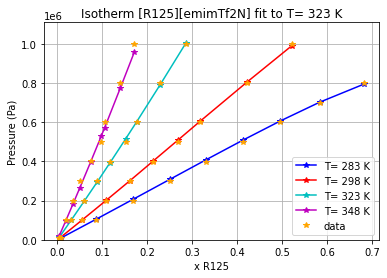

In [20]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to T= 323 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

# T = 348 K

In [21]:
print(data_348)

   temperature  pressure  x_R125  x_emimTf2N
0        348.1     10200   0.004       0.996
1        348.1    100000   0.018       0.982
2        348.1    199700   0.034       0.966
3        348.1    299800   0.050       0.950
4        348.1    399800   0.074       0.926
5        348.1    500100   0.097       0.903
6        348.1    599600   0.105       0.895
7        348.2    799800   0.140       0.860
8        348.1    999700   0.171       0.829


In [22]:
binary_params_peng(data_348, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  348.1, init_press =  100000 , init_x_c1 =    0.018, init_x_c2 = 0.982,
    init_kappa_2_1 = k21_323, init_kappa_1_2 = k12_323, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-04 01:41:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:35 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:41:35 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:35 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:41:35 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:41:35 [INFO] idaes.init.fs.state_

In [23]:
k12_348 = -0.016143327913304143
k21_348 = -0.038

In [24]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", k21_348, k12_348,verbose=False)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


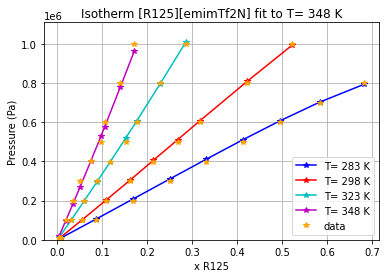

In [25]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to T= 348 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

# Kappas vs T

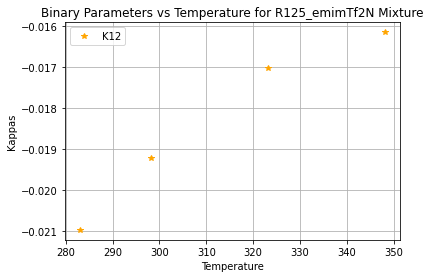

K12 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.02096267 -0.01921155 -0.01700665 -0.01614333]


In [26]:
K12 = np.array([k12_283, k12_298, k12_323, k12_348])
T = np.array([283.1, 298.1, 323.1, 348.1]) #K
plt.plot(T,K12,"*",color='orange',label="K12") 
plt.title('Binary Parameters vs Temperature for R125_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K12 Values for T= ', T, 'are: ')
print(K12)

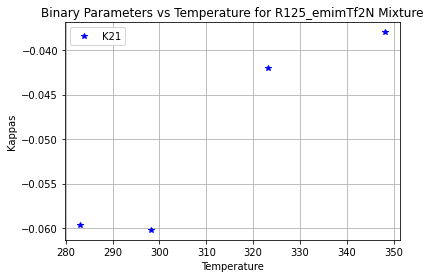

K21 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.05967357 -0.06020143 -0.04196707 -0.038     ]


In [27]:
K21 = np.array([k21_283, k21_298, k21_323, k21_348])
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R125_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

# Best Fit

In [28]:
binary_params_peng(data, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =   298.2, init_press =  399600 , init_x_c1 =    0.213, init_x_c2 = 0.787,
    init_kappa_2_1 = k21_283, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-05-04 01:42:07 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:07 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:42:07 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:08 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:42:08 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:08 [INFO] idaes.init.fs.state_

2021-05-04 01:42:13 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:13 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:42:13 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:14 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-05-04 01:42:14 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-05-04 01:42:14 [INFO] idaes.init.fs.state_

  18  2.3132157e+01 6.51e-01 1.03e+06  -1.0 1.14e+08    -  3.37e-02 3.55e-06h 15
  19r 2.3132157e+01 6.51e-01 1.00e+03  -0.2 0.00e+00    -  0.00e+00 3.28e-07R 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20r 2.3132178e+01 4.77e-01 9.94e+02  -0.2 1.11e+03    -  6.16e-03 6.76e-03f  1
  21r 2.3132178e+01 4.77e-01 9.99e+02  -0.3 0.00e+00    -  0.00e+00 1.02e-07R  2
  22r 2.3132193e+01 4.78e-01 9.89e+02  -0.3 1.52e+03    -  8.17e-03 1.02e-02f  1
  23r 2.3132193e+01 4.78e-01 9.86e+02  -0.3 5.60e+02    -  2.11e-01 2.57e-03f  1
  24r 2.3132121e+01 4.78e-01 9.34e+02  -0.3 7.35e+02    -  4.18e-03 5.56e-02f  1
  25r 2.3131987e+01 4.77e-01 8.84e+02  -0.3 7.51e+02    -  4.72e-02 1.44e-01f  1
  26r 2.3131922e+01 4.77e-01 7.71e+02  -0.3 7.58e+02    -  1.64e-01 6.72e-02f  1
  27r 2.3132428e+01 4.75e-01 7.49e+02  -0.3 7.32e+02    -  1.04e-01 1.65e-01f  1
  28r 2.3132518e+01 4.74e-01 6.64e+02  -0.3 5.55e+02    -  1.11e-01 9.03e-02f  1
  29r 2.3132705e+01 4.68e-01

In [29]:
k12 = -0.01592334684066973
k21 = -0.03479508766508893

In [30]:
R125_x,P= calc_outlet_xP(data,m,"R125", "emimTf2N", k21, k12,verbose=False)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


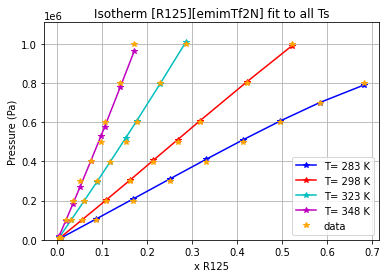

k12:  -0.01592334684066973
k21:  -0.03479508766508893


In [31]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:36],P[27:36],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][emimTf2N] fit to all Ts')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()
print('k12: ', k12)
print('k21: ', k21)